In [462]:
import numpy as np
from numpy import array
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [341]:
def hypothesis(x, weight):
    return weight[1] * np.log(x**2) + weight[0]

In [342]:
def optimize(x,y,alpha,weight):
    N = len(y)
    currunt_y = hypothesis(x,weight)
    cost = round(sum([i**2 for i in (y-currunt_y)])/N,10)
    m_gredient = sum(x * (currunt_y - y)) / N
    b_gredient = sum(currunt_y - y) / N
    weight[1] -= alpha * m_gredient
    weight[0] -= alpha * b_gredient
    return weight,cost

In [466]:
def non_linear_fit(x,y,weight,alpha,itertaion=400000):
    for i in range(1,itertaion):
        weight,cost = optimize(x,y,alpha,weight)
    print("cost is :\t",cost,"\nWeight is :\t",weight)
    return weight

In [487]:
x = [20,
16,
19.79999924,
18.39999962,
17.10000038,
15.5,
14.69999981,
17.10000038,
15.39999962,
16.20000076,
15,
17.20000076,
16,
17,
14.39999962,
]
y = [88.59999847,
71.59999847,
93.30000305,
84.30000305,
80.59999847,
75.19999695,
69.69999695,
82,
69.40000153,
83.30000305,
79.59999847,
82.59999847,
80.59999847,
83.5,
76.30000305,
]
x,y = map(np.array,zip(*sorted(zip(x,y))))

weight = [1,0]
alpha = 0.001

In [488]:
weight = non_linear_fit(x,y,weight,alpha)

cost is :	 13.3253257138 
Weight is :	 [-57.02225576314988, 24.419012407362356]


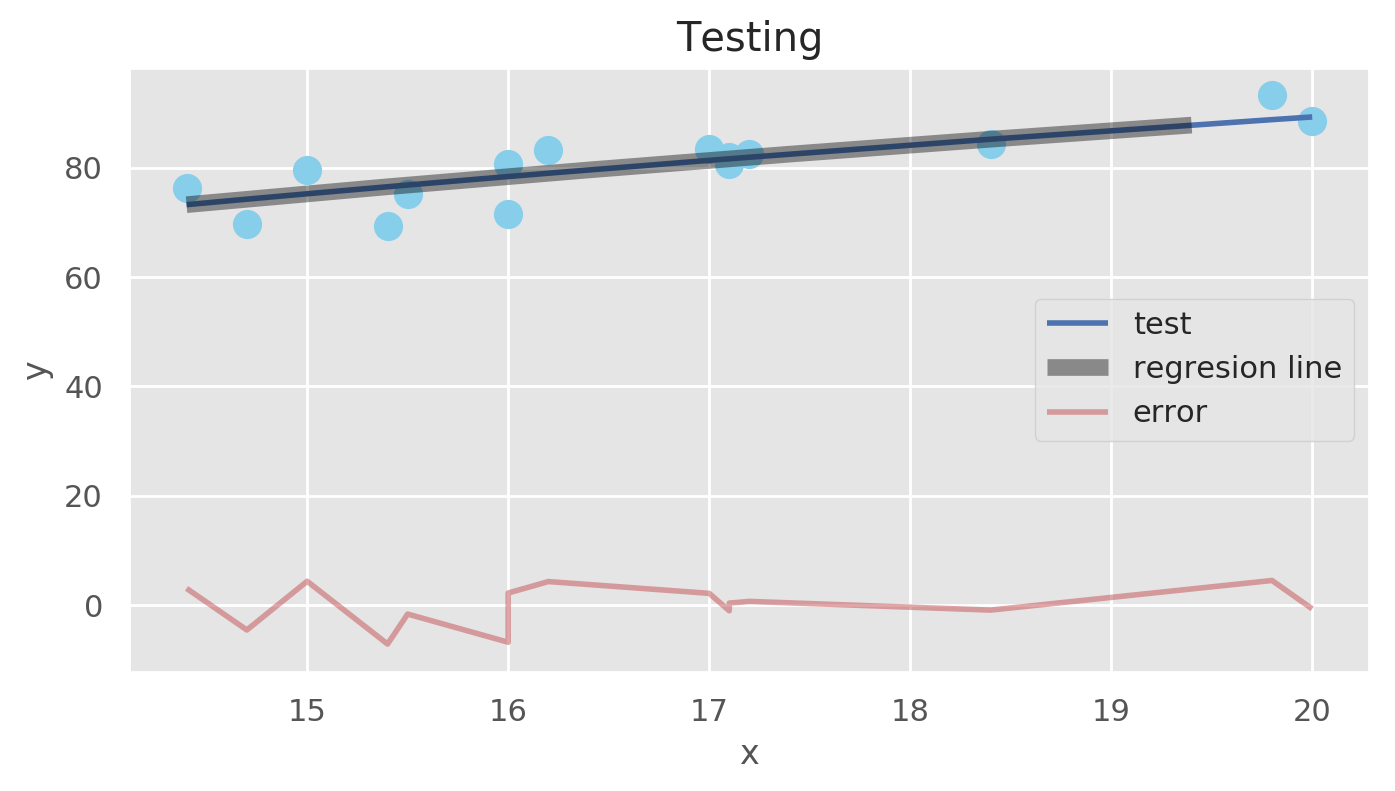

In [489]:
fig, ax = plt.subplots(figsize=(8,4),dpi=200)
ax.scatter(x, y,c="skyblue", s=100,label="points")
ax.set_title("Testing")
ax.set_xlabel("x")
ax.set_ylabel("y")
plot_y = hypothesis(x,weight)
test, = ax.plot(x,plot_y,c="b",label="test")
error, =ax.plot(x,y-plot_y,alpha=0.5,c="r",label="error")
X = np.arange(min(x),max(x))
Y = hypothesis(X,weight)
reg, = ax.plot(X,Y,c="black",alpha=0.4,linewidth=6,label ="regresion line")
plt.legend(handles=[test,reg,error])